In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
def gamma(t):
    return 1. / (100 + t)

In [6]:
def decision_function(X, w):
    """ fonction de prediction a partir d'un vecteur directeur"""
    return np.dot(X, w[1:]) + w[0]

In [7]:
def predict(X, w):
    """ fonction de prediction de classe a partir d'un vecteur directeur"""
    return np.sign(decision_function(X, w))

In [183]:
def stochastic_gradient(X, y,gamma, n_iter, w_ini, loss="mse",alpha=0, average=False):
    """Stochastic gradient algorithm

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        The data
    y : array, shape (n_samples,)
        The targets.
    gamma : float | callable
        The step size. Can be a constant float or a function
        that allows to have a variable step size (QUESTION 5).
    n_iter : int
        The number of iterations
    w_ini : array, shape (n_features + 1,)
        The initial value of w.
    loss : str
        The type of loss function to use, e.g. "hinge" ou "mse".
    alpha : float
        The regularization coefficient.
        QUESTION 3
    average : bool
        Do an averaged stochastic gradient.
        QUESTION 2

    Returns
    -------
    w : array, shape (n_features + 1,)
        The final weights.
    all_w : array, shape (n_iter, n_features + 1)
        The weights across iterations.
    pobj : array, shape (n_iter,)
        The evolution of the cost function across iterations.
    """
    n_samples = X.shape[0]
    X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)
    all_w = np.zeros((n_iter, w_ini.size))
    all_w[0] = w_ini
    w = w_ini.copy()
    pobj = np.zeros(n_iter)

    if not callable(gamma):
        # Turn gamma to a function for QUESTION ???

        def gamma_func(t):
            return gamma
    else:
        gamma_func = gamma

    for t in range(n_iter):
        idx = np.random.randint(n_samples)
        if loss == "mse":
            pobj[t] = 0.5 * np.mean((y - np.dot(X, w)) ** 2)
            gradient = X[idx] * (np.dot(w,X[idx])-y[idx]); # QUESTIONS 2 et 3 ici on code W.T X
                
        elif loss == "hinge":
            diff = 1-y[idx] * (X[idx] @ w) 
            if diff > 0 :
                pobj[t] = diff
                gradient = -y[idx]
            else :
                pobj[t] = 0.0
                gradient = 0.0

        
        if average is True:
            raise NotImplementedError('QUESTION 10')

        if alpha > 0:
            pobj[t]+= (alpha /2) * np.dot(w,w)
            gradient += alpha * w 
            
        w -= gamma_func(t) * gradient
        
        all_w[t] = w
    return w, all_w, pobj

In [217]:
n_samples = 1000
n_features = 1000
n_iter = 1000  # number of iterations
gamma = 0.1  # suggested step size
alpha = 0

In [218]:
X_toy = np.random.randn(n_samples, n_features)
epsilon_toy = np.random.randn(n_samples) * 1e-5
w_target = np.ones(n_features)
y_toy = X_toy.dot(w_target) + epsilon_toy

In [219]:
# Initialize w with just zeros
w_ini = np.random.random(X_toy.shape[1] + 1)

In [220]:
loss = 'mse'
# loss = 'hinge'  # QUESTION 4

In [221]:
w_toy, all_w, pobj = stochastic_gradient(X_toy, y_toy, gamma, n_iter, w_ini,
                                         loss=loss, alpha=alpha, average=False)

C:\Dev\Anaconda\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: overflow encountered in square
C:\Dev\Anaconda\lib\site-packages\numpy\core\_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Dev\Anaconda\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in multiply


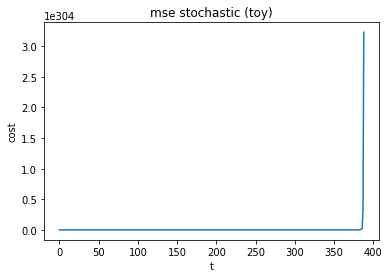

In [222]:
plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic (toy)' % loss)
plt.show()

In [225]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [226]:
X = X[y < 2]
y = y[y < 2]
y[y == 0] = -1
X = X[:, :2]

In [227]:
# A function for vizualizing the data and classification given by w
def plot_2d(X, y, w=None):
    """ Plot in 2D the dataset data, colors and symbols according to the
    class given by the vector y (if given); the separating hyperplan w can
    also be displayed if asked"""
    plt.figure()
    symlist = ['o', 's', '+', 'x', 'D', '*', 'p', 'v', '-', '^']
    collist = ['blue', 'red', 'purple', 'orange', 'salmon', 'black', 'grey',
               'fuchsia']

    labs = np.unique(y)
    idxbyclass = [y == labs[i] for i in range(len(labs))]

    for i in range(len(labs)):
        plt.plot(X[idxbyclass[i], 0], X[idxbyclass[i], 1], '+',
                 color=collist[i % len(collist)], ls='None',
                 marker=symlist[i % len(symlist)])
    plt.ylim([np.min(X[:, 1]), np.max(X[:, 1])])
    plt.xlim([np.min(X[:, 0]), np.max(X[:, 0])])
    mx = np.min(X[:, 0])
    maxx = np.max(X[:, 0])
    if w is not None:
        plt.plot([mx, maxx], [mx * -w[1] / w[2] - w[0] / w[2],
                              maxx * -w[1] / w[2] - w[0] / w[2]],
                 "g", alpha=1.)
    plt.show()

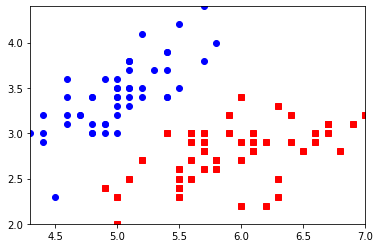

In [228]:
plot_2d(X[:, :2], y)

In [238]:
# QUESTION 8
gamma = 0.01  # step size
n_iter = 100  # number of iterations

In [239]:
loss = 'mse'
# loss = 'hinge'  # QUESTION 11

In [241]:
# Initialize w with just zeros
w_ini = np.random.random(X.shape[1] + 1)

In [242]:
w, all_w, pobj = stochastic_gradient(X, y, gamma, n_iter, w_ini, loss=loss)

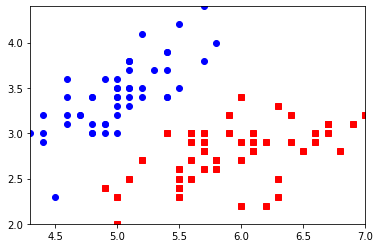

In [246]:
plot_2d(X, y, w)
#plt.title('%s stochastic' % loss);

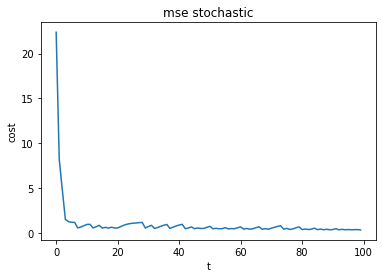

In [244]:
plt.figure()
plt.plot(pobj)
plt.xlabel('t')
plt.ylabel('cost')
plt.title('%s stochastic' % loss)
plt.show()